In [1]:
#!/bin/python3
import numpy as np
import matplotlib.pylab as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/fran/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Constantes

In [2]:
MHZ = 1e6
KHZ = 1e3
c = 299792458
f = 436*10
_lambda = c/f
k = 2*np.pi/_lambda
d = _lambda/2
mx = 4
my = 4
size = 1024**2
fs = 32*KHZ


## Contador

In [3]:
array = np.arange(16)

In [4]:

output = np.zeros((size,16), dtype='short')
for i in range(size):
    output[i,:] = array

In [5]:
np.save("contador_bytes_al_reves.npy", output)

## Generemos una señal compleja desfasada nostros mismos

In [6]:
#incoming angles
theta = np.radians(30.)
phi = np.radians(60.)
print(theta, phi-np.pi)

0.5235987755982988 -2.0943951023931957


In [13]:

#signal = np.zeros((size,mx*my), dtype='float64')
#Generate signal [s_1;s_2;...;s_size]*[1, ..., np.exp(-1j*k*d((mx-1)*cos(theta)*cos(phi) + (my-1)*cos(theta)*sin(phi)))]
complex_wave = np.exp(1j*2*np.pi*f*np.arange(size, dtype='complex64')/fs)

deltas = np.empty((mx*my, 1), dtype=np.complex64)
for i in range(mx):
    for j in range(my):
        deltas[i*my+j] = i*np.cos(phi) + j*np.sin(phi)
phase_deltas = np.exp(1j*k*d*np.cos(theta)*deltas)
pure_signal = np.kron( complex_wave, phase_deltas).T
noise = 5*np.random.randn(*pure_signal.shape) + 5*1j*np.random.randn(*pure_signal.shape)
signal = pure_signal + noise.astype(np.complex64)

In [14]:
np.shape(signal)

(1048576, 16)

In [15]:
flattened_signal = signal.flatten()

In [17]:
np.save("./bin/simulated_signal_theta_30_phi_60_dos.npy", flattened_signal)

(50.0, 70.0)

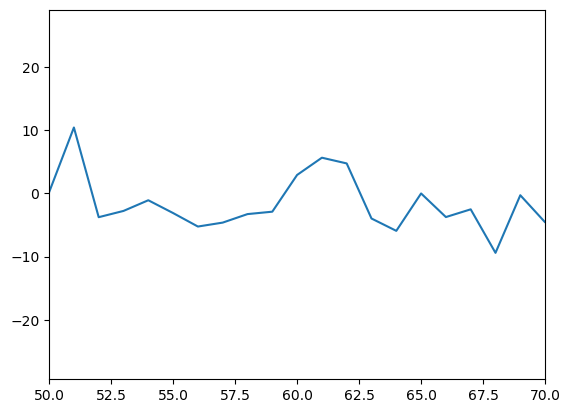

In [11]:
plt.plot(signal[:,0].imag)
plt.xlim(50,70)

In [12]:
np.save("../binarios/headerDetector_10-element-array-counter.npy", np.arange(10))

FileNotFoundError: [Errno 2] No such file or directory: '../binarios/headerDetector_10-element-array-counter.npy'

### Funciona en el gnu radio sacando un offset de 128 bytes de header de numpy. Ahora veamos solo la parte real

In [ ]:
real_signal = signal.real
real_flattened_signal = real_signal.flatten()

In [ ]:
np.save("../binarios/simulated_signal_theta_30_phi_60_real.npy", real_flattened_signal)

In [ ]:
np.degrees(1.05)

60.160568488736445

In [ ]:
np.degrees(-1.63)

-93.39212060632418